In [38]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv('./data./train.csv')
df.head()

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6


In [3]:
df.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,23008.000000,23008.000000,23007.000000,9150.000000,23011.000000,23007.000000,22893.000000,18149.000000,22645.000000,23011.000000
mean,17.071714,8.451960,8.619277,9.593683,65.202851,2.380993,5.858826,11.933170,48.653526,12.415419
std,10.714471,10.578285,2.907096,21.966135,14.549077,0.947595,3.816941,6.419122,31.662321,10.489515
min,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,7.800000,-0.300000,6.600000,0.100000,54.900000,1.700000,2.200000,7.000000,17.800000,3.400000
50%,18.900000,9.200000,8.600000,1.400000,65.500000,2.200000,6.600000,11.220000,55.700000,13.800000
75%,26.400000,17.900000,10.600000,8.500000,75.800000,2.900000,9.000000,16.620000,78.000000,21.800000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [5]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Users\\navyb\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMJUA_ttf.ttf',
 'C:\\Windows\\Fonts\\MaruBuri-Regular.ttf',
 'C:\\Windows\\Fonts\\corbeli.ttf',
 'C:\\Windows\\Fonts\\PLAYBILL.TTF',
 'C:\\Windows\\Fonts\\HARLOWSI.TTF',
 'C:\\Windows\\Fonts\\BOD_BI.TTF',
 'C:\\Windows\\Fonts\\OLDENGL.TTF',
 'C:\\Windows\\Fonts\\FTLTLT.TTF',
 'C:\\Windows\\Fonts\\arial.ttf',
 'C:\\Windows\\Fonts\\LeelawUI.ttf',
 'C:\\Windows\\Fonts\\timesbi.ttf',
 'C:\\Windows\\Fonts\\taile.ttf',
 'C:\\Windows\\Fonts\\mmrtextb.ttf',
 'C:\\Windows\\Fonts\\YuGothL.ttc',
 'C:\\Windows\\Fonts\\FRSCRIPT.TTF',
 'C:\\Windows\\Fonts\\WINGDNG2.TTF',
 'C:\\Windows\\Fonts\\javatext.ttf',
 'C:\\Windows\\Fonts\\FRABKIT.TTF',
 'C:\\Windows\\Fonts\\GOUDOSI.TTF',
 'C:\\Windows\\Fonts\\STENCIL.TTF',
 'C:\\Windows\\Fonts\\NanumBarunpenR.ttf',
 'C:\\Windows\\Fonts\\FRABK.TTF',
 'C:\\Windows\\Fonts\\consolai.ttf',
 'C:\\Windows\\Fonts\\GOTHICBI.TTF',
 'C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\calibril.ttf',
 'C

In [5]:
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\NanumSquareR.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


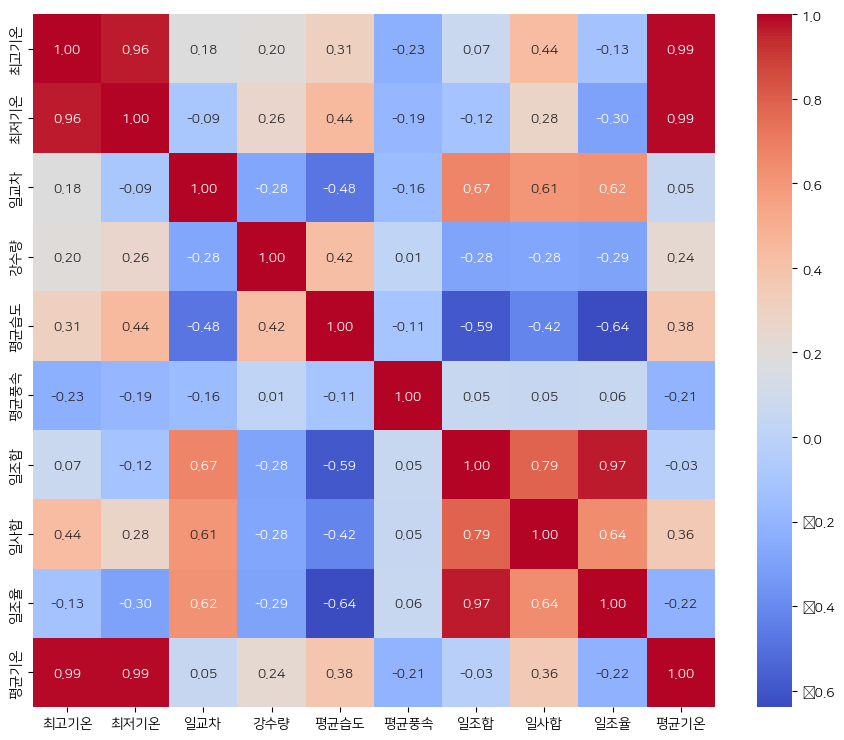

In [7]:
columns = df[['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율', '평균기온']]
plt.figure(figsize=(11, 9))
sns.heatmap(columns.corr(), annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

## eda
- 최고, 최저, 평균 기온의 관련성은 역시 높다
- 일교차, 일조율, 일조합도 서로 비례하는 것으로 보인다.
- 강수량과 평균습도는 비례
- 일조율/일조합과 평균습도는 반비례한다.

In [6]:
df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [7]:
df.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [9]:
# fillna를 무엇으로 해야할까

In [8]:
df['일시'] = pd.to_datetime(df['일시'], format= '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      23011 non-null  datetime64[ns]
 1   최고기온    23008 non-null  float64       
 2   최저기온    23008 non-null  float64       
 3   일교차     23007 non-null  float64       
 4   강수량     9150 non-null   float64       
 5   평균습도    23011 non-null  float64       
 6   평균풍속    23007 non-null  float64       
 7   일조합     22893 non-null  float64       
 8   일사합     18149 non-null  float64       
 9   일조율     22645 non-null  float64       
 10  평균기온    23011 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.9 MB


In [14]:
df['year'] = df['일시'].dt.year

C:\Users\navyb\AppData\Local\Temp\ipykernel_19032\795068451.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


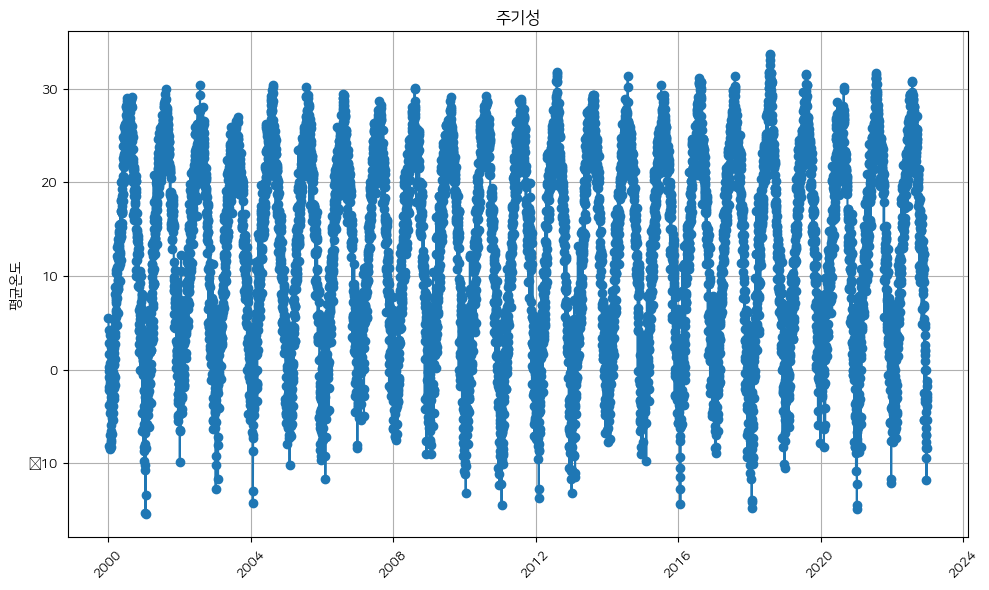

In [17]:
# 평균 온도 주기성 살펴보기
dates = df['일시']
average_temp = df['평균기온']
dates_2000_2022 = df[(df['year'] >= 2000) & (df['year'] <= 2022)]
plt.figure(figsize=(10, 6))
plt.plot(dates_2000_2022['일시'], dates_2000_2022['평균기온'], marker='o', linestyle='-')
plt.title('주기성')
plt.ylabel('평균온도')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
df1 = df.loc[:, ['일시', '평균기온']]
df1.index = df1['일시']
df1 = df1.drop(columns= '일시')
df1

,평균기온
일시,
1960-01-01,-1.6
1960-01-02,-1.9
1960-01-03,4.0
1960-01-04,7.5
1960-01-05,-4.6
...,...
2022-12-27,-2.6
2022-12-28,-3.3
2022-12-29,-2.9


In [12]:
pip install statsmodels

                                              0.0/9.9 MB ? eta -:--:--
     -                                        0.5/9.9 MB 10.0 MB/s eta 0:00:01
     -----                                    1.4/9.9 MB 14.8 MB/s eta 0:00:01
     ----------                               2.6/9.9 MB 18.4 MB/s eta 0:00:01
     ----------------                         4.0/9.9 MB 21.4 MB/s eta 0:00:01
     ---------------------                    5.2/9.9 MB 23.9 MB/s eta 0:00:01
     ---------------------------              6.9/9.9 MB 25.7 MB/s eta 0:00:01
     ----------------------------------       8.6/9.9 MB 27.3 MB/s eta 0:00:01
     ---------------------------------------  9.9/9.9 MB 28.6 MB/s eta 0:00:01
     ---------------------------------------- 9.9/9.9 MB 27.4 MB/s eta 0:00:00
                                              0.0/233.9 kB ? eta -:--:--
     ------------------------------------- 233.9/233.9 kB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\navyb\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [13]:
from statsmodels.tsa.stattools import adfuller
adfuller(df1, autolag='AIC')

(-16.61918613006999,
 1.7040000780817657e-29,
 47,
 22963,
 {'1%': -3.4306348073488953,
  '5%': -2.861665875733115,
  '10%': -2.5668370000577982},
 100818.50015374788)

In [14]:
# ADF 결과 중 통계량, p-value, 기각역을 계산하고 출력하는 함수 정의 및 실행
def ADF_test(data):
    # ADF 실시
    results = adfuller(data, autolag='AIC')

    # 통계량
    s = results[0]
    # p-value
    p = results[1]
    # 기각역
    cv = results[4]

    # 출력
    print('-'*30)
    print('Augmented Dickey-Fuller Test')
    print('H0 : 단위근이 존재한다 (비정상 시계열)')
    print('Ha : 단위근이 없다 (정상 시계열)')
    print('Critical Values : {}'.format(cv))
    print('-'*30)
    print('Test Statistics : {:.4f}'.format(s))
    print('p-value : {:.4f}'.format(p))
    print('-'*30)

In [15]:
ADF_test(df1)

------------------------------
Augmented Dickey-Fuller Test
H0 : 단위근이 존재한다 (비정상 시계열)
Ha : 단위근이 없다 (정상 시계열)
Critical Values : {'1%': -3.4306348073488953, '5%': -2.861665875733115, '10%': -2.5668370000577982}
------------------------------
Test Statistics : -16.6192
p-value : 0.0000
------------------------------


### p-value가 0.05보다 작으므로 정상 시계열이다

C:\Users\navyb\AppData\Local\Temp\ipykernel_2052\4287888381.py:29: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


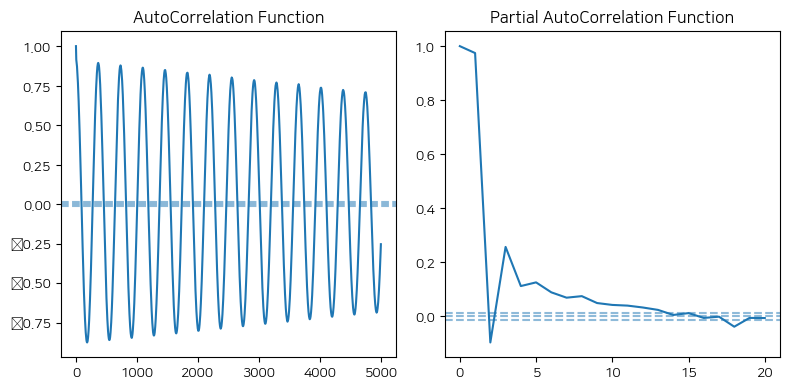

In [25]:
# ACF and PACF
from statsmodels.tsa.stattools import acf, pacf

# ACF
acf_5000 = acf(x=df1, nlags=5000)
# PACF
pacf_20 = pacf(x=df1, nlags=20, method='ols')

# 95% 신뢰구간 계산하기
confidence = 1.96/np.sqrt(len(df1))

# 시각화
plt.figure(figsize=(8, 4))
# ACF
plt.subplot(1, 2, 1)
plt.plot(acf_5000)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('AutoCorrelation Function')
# PACF
plt.subplot(1,2,2)
plt.plot(pacf_20)
plt.axhline(y=0, linestyle='--', alpha=0.5)
plt.axhline(y=-confidence, linestyle='--', alpha=0.5)
plt.axhline(y=confidence, linestyle='--', alpha=0.5)
plt.title('Partial AutoCorrelation Function')

plt.tight_layout()

### AutoCorrelation Function이 이상치를 보이고 있으므로 ARIMA보다 계절성을 가지는 SARIMA가 적합해 보인다.


In [ ]:
# SARIMA 모델의 최적 하이퍼 파라미터를 탐색한다.
# parameter search
p = range(0, 5)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

AIC = []
params = []
for i in pdq :
    for j in seasonal_pdq:
        try:
            model = SARIMAX(df1['평균기온'].values, order=(i), seasonal_order = (j))
            model_fit = model.fit()
            print(f'SARIMA : {i}, {j} >> AIC : {round(model_fit.aic, 2)}')
            AIC.append(round(model_fit.aic, 2))
            params.append((i, j))
        except Exception as e:
            print(e)
            continue

SARIMA : (0, 0, 0), (0, 0, 0, 12) >> AIC : 193627.17
SARIMA : (0, 0, 0), (0, 0, 1, 12) >> AIC : 172398.25
SARIMA : (0, 0, 0), (0, 1, 0, 12) >> AIC : 137824.71
SARIMA : (0, 0, 0), (0, 1, 1, 12) >> AIC : 137029.35
SARIMA : (0, 0, 0), (1, 0, 0, 12) >> AIC : 137400.81
SARIMA : (0, 0, 0), (1, 0, 1, 12) >> AIC : 136756.62
SARIMA : (0, 0, 0), (1, 1, 0, 12) >> AIC : 136725.94
SARIMA : (0, 0, 0), (1, 1, 1, 12) >> AIC : 136560.64
SARIMA : (0, 0, 0), (2, 0, 0, 12) >> AIC : 136479.02
SARIMA : (0, 0, 0), (2, 0, 1, 12) >> AIC : 136290.54
SARIMA : (0, 0, 0), (2, 1, 0, 12) >> AIC : 136281.51
SARIMA : (0, 0, 0), (2, 1, 1, 12) >> AIC : 135102.33
SARIMA : (0, 0, 0), (3, 0, 0, 12) >> AIC : 135918.02
SARIMA : (0, 0, 0), (3, 0, 1, 12) >> AIC : 133995.3
SARIMA : (0, 0, 0), (3, 1, 0, 12) >> AIC : 135236.33
SARIMA : (0, 0, 0), (3, 1, 1, 12) >> AIC : 134552.73
SARIMA : (0, 0, 0), (4, 0, 0, 12) >> AIC : 134611.75
SARIMA : (0, 0, 0), (4, 0, 1, 12) >> AIC : 133284.42
SARIMA : (0, 0, 0), (4, 1, 0, 12) >> AIC : 1345

C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 0, 0), (3, 0, 1, 12) >> AIC : 104832.56
SARIMA : (1, 0, 0), (3, 1, 0, 12) >> AIC : 108930.66
SARIMA : (1, 0, 0), (3, 1, 1, 12) >> AIC : 105089.27
SARIMA : (1, 0, 0), (4, 0, 0, 12) >> AIC : 104928.61


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 0, 0), (4, 0, 1, 12) >> AIC : 104821.25
SARIMA : (1, 0, 0), (4, 1, 0, 12) >> AIC : 108268.98
SARIMA : (1, 0, 0), (4, 1, 1, 12) >> AIC : 105090.16
SARIMA : (1, 0, 1), (0, 0, 0, 12) >> AIC : 104592.52
SARIMA : (1, 0, 1), (0, 0, 1, 12) >> AIC : 104593.38
SARIMA : (1, 0, 1), (0, 1, 0, 12) >> AIC : 116475.81
SARIMA : (1, 0, 1), (0, 1, 1, 12) >> AIC : 104402.48
SARIMA : (1, 0, 1), (1, 0, 0, 12) >> AIC : 104593.33


C:\Users\navyb\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA : (1, 0, 1), (1, 0, 1, 12) >> AIC : 104429.33
SARIMA : (1, 0, 1), (1, 1, 0, 12) >> AIC : 110912.86
SARIMA : (1, 0, 1), (1, 1, 1, 12) >> AIC : 104398.3


In [35]:
# optimal parameter
optim = [(params[i], j) for i, j in enumerate(AIC) if j == min(AIC)]
print(optim)

[]
